Привет! Меня зовут Лиза Колесник, я буду делать ревью твоего самостоятельного проекта по исследовательскому анализу данных. Давай будем общаться на «ты».

Ты проделал большую исследовательскую работу! Ты внимательно работаешь с данными и без проблем находишь зависимые параметры. Мои комментарии будут в ячейках "Комментарий от ревьюера".

<div class="alert alert-danger"> 
Красным цветом обозначены комментарии, на которые тебе нужно обратить внимание в первую очередь, чтобы я приняла проект. 
</div>
<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь сделать немного по другому. Ты можешь учесть эти комментарии при выполнении следующих проектов.
</div>
<div class="alert alert-success">
Зелёным цветом обозначены твои удачные решения, которые ты без сомнения можешь применять в будущих проектах.
</div>

Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом. Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.

---


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-1"><span class="toc-item-num">1&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-3"><span class="toc-item-num">3&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#КОММЕНТАРИЙ-ОТ-УЧЕНИКА:" data-toc-modified-id="КОММЕНТАРИЙ-ОТ-УЧЕНИКА:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>КОММЕНТАРИЙ ОТ УЧЕНИКА:</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#Поле-floors_total" data-toc-modified-id="Поле-floors_total-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Поле floors_total</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-8"><span class="toc-item-num">8&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Поле-ceiling_height" data-toc-modified-id="Поле-ceiling_height-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>Поле ceiling_height</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-9"><span class="toc-item-num">9&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#КОММЕНТАРИЙ-ОТ-УЧЕНИКА:" data-toc-modified-id="КОММЕНТАРИЙ-ОТ-УЧЕНИКА:-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>КОММЕНТАРИЙ ОТ УЧЕНИКА:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Поле-living_area" data-toc-modified-id="Поле-living_area-10.0.1"><span class="toc-item-num">10.0.1&nbsp;&nbsp;</span>Поле living_area</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-11"><span class="toc-item-num">11&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#КОММЕНТАРИЙ-ОТ-УЧЕНИКА:" data-toc-modified-id="КОММЕНТАРИЙ-ОТ-УЧЕНИКА:-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>КОММЕНТАРИЙ ОТ УЧЕНИКА:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Поле-is_apartment" data-toc-modified-id="Поле-is_apartment-12.0.1"><span class="toc-item-num">12.0.1&nbsp;&nbsp;</span>Поле is_apartment</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-13"><span class="toc-item-num">13&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#КОММЕНТАРИЙ-ОТ-УЧЕНИКА:" data-toc-modified-id="КОММЕНТАРИЙ-ОТ-УЧЕНИКА:-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>КОММЕНТАРИЙ ОТ УЧЕНИКА:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Поле-kitchen_area" data-toc-modified-id="Поле-kitchen_area-14.0.1"><span class="toc-item-num">14.0.1&nbsp;&nbsp;</span>Поле kitchen_area</a></span></li><li><span><a href="#Заполнение-записей-с-одновременно-пропущенными-kitchen_area-и-living_area" data-toc-modified-id="Заполнение-записей-с-одновременно-пропущенными-kitchen_area-и-living_area-14.0.2"><span class="toc-item-num">14.0.2&nbsp;&nbsp;</span>Заполнение записей с одновременно пропущенными kitchen_area и living_area</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-15"><span class="toc-item-num">15&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#КОММЕНТАРИЙ-ОТ-УЧЕНИКА:" data-toc-modified-id="КОММЕНТАРИЙ-ОТ-УЧЕНИКА:-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>КОММЕНТАРИЙ ОТ УЧЕНИКА:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Поле-balcony" data-toc-modified-id="Поле-balcony-16.0.1"><span class="toc-item-num">16.0.1&nbsp;&nbsp;</span>Поле balcony</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-17"><span class="toc-item-num">17&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Поле-locality_name" data-toc-modified-id="Поле-locality_name-17.0.1"><span class="toc-item-num">17.0.1&nbsp;&nbsp;</span>Поле locality_name</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-18"><span class="toc-item-num">18&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Поле-airports_nearest" data-toc-modified-id="Поле-airports_nearest-18.0.1"><span class="toc-item-num">18.0.1&nbsp;&nbsp;</span>Поле airports_nearest</a></span></li><li><span><a href="#Поле-cityCenters_nearest" data-toc-modified-id="Поле-cityCenters_nearest-18.0.2"><span class="toc-item-num">18.0.2&nbsp;&nbsp;</span>Поле cityCenters_nearest</a></span></li><li><span><a href="#Поле-parks_around3000" data-toc-modified-id="Поле-parks_around3000-18.0.3"><span class="toc-item-num">18.0.3&nbsp;&nbsp;</span>Поле parks_around3000</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-19"><span class="toc-item-num">19&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Поле-parks_nearest" data-toc-modified-id="Поле-parks_nearest-19.0.1"><span class="toc-item-num">19.0.1&nbsp;&nbsp;</span>Поле parks_nearest</a></span></li><li><span><a href="#Поле-ponds_around3000" data-toc-modified-id="Поле-ponds_around3000-19.0.2"><span class="toc-item-num">19.0.2&nbsp;&nbsp;</span>Поле ponds_around3000</a></span></li><li><span><a href="#Поле-ponds_nearest" data-toc-modified-id="Поле-ponds_nearest-19.0.3"><span class="toc-item-num">19.0.3&nbsp;&nbsp;</span>Поле ponds_nearest</a></span></li><li><span><a href="#Поле-days_exposition" data-toc-modified-id="Поле-days_exposition-19.0.4"><span class="toc-item-num">19.0.4&nbsp;&nbsp;</span>Поле days_exposition</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-19.0.5"><span class="toc-item-num">19.0.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-20"><span class="toc-item-num">20&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-20.1"><span class="toc-item-num">20.1&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-20.2"><span class="toc-item-num">20.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-21"><span class="toc-item-num">21&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#Расчет-дополнительных-полей" data-toc-modified-id="Расчет-дополнительных-полей-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>Расчет дополнительных полей</a></span><ul class="toc-item"><li><span><a href="#Цена-квадратного-метра" data-toc-modified-id="Цена-квадратного-метра-22.1"><span class="toc-item-num">22.1&nbsp;&nbsp;</span>Цена квадратного метра</a></span></li><li><span><a href="#Даты" data-toc-modified-id="Даты-22.2"><span class="toc-item-num">22.2&nbsp;&nbsp;</span>Даты</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-22.3"><span class="toc-item-num">22.3&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#Cоотношение-площади" data-toc-modified-id="Cоотношение-площади-22.4"><span class="toc-item-num">22.4&nbsp;&nbsp;</span>Cоотношение площади</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-22.5"><span class="toc-item-num">22.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-23"><span class="toc-item-num">23&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-24"><span class="toc-item-num">24&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-площади,-цены,-числа-комнат,-высоты-потолков" data-toc-modified-id="Исследование-площади,-цены,-числа-комнат,-высоты-потолков-24.1"><span class="toc-item-num">24.1&nbsp;&nbsp;</span>Исследование площади, цены, числа комнат, высоты потолков</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-24.1.1"><span class="toc-item-num">24.1.1&nbsp;&nbsp;</span>Площадь</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-25"><span class="toc-item-num">25&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Цена" data-toc-modified-id="Цена-25.0.1"><span class="toc-item-num">25.0.1&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-25.0.2"><span class="toc-item-num">25.0.2&nbsp;&nbsp;</span>Число комнат</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-26"><span class="toc-item-num">26&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-26.0.1"><span class="toc-item-num">26.0.1&nbsp;&nbsp;</span>Высота потолков</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-27"><span class="toc-item-num">27&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-27.0.1"><span class="toc-item-num">27.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-28"><span class="toc-item-num">28&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><span><a href="#Исследование-количества-времени-для-продажи-квартиры" data-toc-modified-id="Исследование-количества-времени-для-продажи-квартиры-28.1"><span class="toc-item-num">28.1&nbsp;&nbsp;</span>Исследование количества времени для продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-28.1.1"><span class="toc-item-num">28.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-29"><span class="toc-item-num">29&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><span><a href="#Анализ-редких-и-выбивающихся-значений" data-toc-modified-id="Анализ-редких-и-выбивающихся-значений-29.1"><span class="toc-item-num">29.1&nbsp;&nbsp;</span>Анализ редких и выбивающихся значений</a></span></li><li><span><a href="#Исследование-факторов,-влияющих-на-стоимость-квартиры" data-toc-modified-id="Исследование-факторов,-влияющих-на-стоимость-квартиры-29.2"><span class="toc-item-num">29.2&nbsp;&nbsp;</span>Исследование факторов, влияющих на стоимость квартиры</a></span></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-30"><span class="toc-item-num">30&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-31"><span class="toc-item-num">31&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-31.0.1"><span class="toc-item-num">31.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-32"><span class="toc-item-num">32&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><span><a href="#Анализ-десяти-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-десяти-населённых-пунктов-с-наибольшим-числом-объявлений-32.1"><span class="toc-item-num">32.1&nbsp;&nbsp;</span>Анализ десяти населённых пунктов с наибольшим числом объявлений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-32.1.1"><span class="toc-item-num">32.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-33"><span class="toc-item-num">33&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-цены-по-степени-удалённости-от-центра" data-toc-modified-id="Анализ-изменения-цены-по-степени-удалённости-от-центра-33.1"><span class="toc-item-num">33.1&nbsp;&nbsp;</span>Анализ изменения цены по степени удалённости от центра</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-33.1.1"><span class="toc-item-num">33.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-34"><span class="toc-item-num">34&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><span><a href="#Сравнение-квартир-в-центре-с-квартирами-по-всему-городу" data-toc-modified-id="Сравнение-квартир-в-центре-с-квартирами-по-всему-городу-34.1"><span class="toc-item-num">34.1&nbsp;&nbsp;</span>Сравнение квартир в центре с квартирами по всему городу</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-34.1.1"><span class="toc-item-num">34.1.1&nbsp;&nbsp;</span>Площадь</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-35"><span class="toc-item-num">35&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-35.0.1"><span class="toc-item-num">35.0.1&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-35.0.2"><span class="toc-item-num">35.0.2&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры-35.0.3"><span class="toc-item-num">35.0.3&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры</a></span></li></ul></li></ul></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-36"><span class="toc-item-num">36&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-36.1"><span class="toc-item-num">36.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-37"><span class="toc-item-num">37&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-38"><span class="toc-item-num">38&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span></li><li><span><a href="#-Комментарий-от-ревьюера" data-toc-modified-id="-Комментарий-от-ревьюера-39"><span class="toc-item-num">39&nbsp;&nbsp;</span> Комментарий от ревьюера</a></span><ul class="toc-item"><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-39.1"><span class="toc-item-num">39.1&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></li></ul></div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
    
<b> Привет ! </b>
    
Для создания содержания я использовал <a href='https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/toc2/README.html'>jupyter_contrib_nbextensions</a>,  правда не знаю на сколько это приемлемо.
</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично! Получилась удобная навигация, молодец. Можно еще использовать HTML разметку для формирования ссылок.
    
Ссылка:
    `[Раздел 1](#step_1)`
    
Заголовок раздела:
    `Раздел 1<a id="step_1"></a>`

</div>


# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

    • airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    • balcony — число балконов
    • ceiling_height — высота потолков (м)
    • cityCenters_nearest — расстояние до центра города (м)
    • days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    • first_day_exposition — дата публикации
    • floor — этаж
    • floors_total — всего этажей в доме
    • is_apartment — апартаменты (булев тип)
    • kitchen_area — площадь кухни в квадратных метрах (м²)
    • last_price — цена на момент снятия с публикации
    • living_area — жилая площадь в квадратных метрах(м²)
    • locality_name — название населённого пункта
    • open_plan — свободная планировка (булев тип)
    • parks_around3000 — число парков в радиусе 3 км
    • parks_nearest — расстояние до ближайшего парка (м)
    • ponds_around3000 — число водоёмов в радиусе 3 км
    • ponds_nearest — расстояние до ближайшего водоёма (м)
    • rooms — число комнат
    • studio — квартира-студия (булев тип)
    • total_area — площадь квартиры в квадратных метрах (м²)
    • total_images — число фотографий квартиры в объявлении

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Не забывай добавлять также описание данных в вводную часть проекта.

</div>

<div class="alert alert-block alert-info">
<h2>КОММЕНТАРИЙ ОТ УЧЕНИКА:</h2>
    
Сделано
</div>

## Обзор данных

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('../data/real_estate_data.csv',sep='\t')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

- Столбцы имеющие пропущенные значения:
 * ceiling_height
 * floors_total
 * living_area
 * is_apartment
 * kitchen_area
 * balcony
 * locality_name
 * airports_nearest
 * cityCenters_nearest
 * parks_around3000
 * parks_nearest
 * ponds_around3000
 * ponds_nearest
 * days_exposition
- Не верный тип у следующих полей: 
 * is_apartment - bool
 * balcony - int
 * days_exposition - int
 * first_day_exposition - date
 * floors_total - int
 * parks_around3000 - int
 * ponds_around3000 - int 

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо.

</div>

## Предобработка данных

### Обработка пропусков 

In [3]:
def present(count__x_percent, count_100_percent = len(data)):
    return 100/ (count_100_percent / count__x_percent)

#### Поле floors_total

In [4]:
data['floors_total'].isna().sum()

86

In [5]:
present(data['floors_total'].isna().sum())

0.3628845098949323

In [6]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Медиана согласуется с ожидаемым значением, заполним пропуски медианой.

In [7]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [8]:
present(data['floors_total'].isna().sum())

0.0

Скорректируем добавленные значения 

In [9]:
def correct_floors_total(row):
    if row.at['floors_total'] < row.at['floor']:
        return row.at['floor']
    
    return row.at['floors_total']

In [10]:
data['floors_total'] = data.apply(correct_floors_total,axis=1)

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично. Хорошо, что ты учел на каком этаже находятся квартиры.

</div>

#### Поле ceiling_height

In [11]:
data['ceiling_height'].isna().sum()

9195

In [12]:
present(data['ceiling_height'].isna().sum())

38.799105447487236

In [13]:
mean_by_floors_total = data.groupby('floors_total')['ceiling_height'].transform('median')

In [14]:
data['ceiling_height'].fillna(mean_by_floors_total, inplace=True)

In [15]:
data[data['ceiling_height'].isna()]['floors_total']

11575    33.0
Name: floors_total, dtype: float64

Осталось одно значение 

In [16]:
data.sort_values('floors_total')['floors_total'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60.])

In [17]:
data[(data['floors_total'] == 29) | (data['floors_total'] == 34)][['floors_total', 'ceiling_height']]

,floors_total,ceiling_height
1697,34.0,2.65
3797,29.0,2.60


Возьмем высоту 34 этажного дома, он нам ближе

In [18]:
data['ceiling_height'].fillna(2.65,inplace=True)

In [19]:
data['ceiling_height'].isna().sum()

0

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Думаю, ты согласишься, что дома бывают разных типов, и соответсвенно высоты потолков тоже. Поэтому при заполнении лучше стоит учитывать типы домов, т.е. их этажность.

</div>

<div class="alert alert-block alert-info">
<h2>КОММЕНТАРИЙ ОТ УЧЕНИКА:</h2>
Переместил поле ceiling_height выше и, если я правильно тебя понял, то как — то так )
</div>

#### Поле living_area

In [20]:
data['living_area'].isna().sum()

1903

In [21]:
present(data['living_area'].isna().sum())

8.029874678256467

In [22]:
def fill_living_area(row):
    if pd.notna(row['living_area']):
        return row.at['living_area']
    
    if pd.notna(row['total_area']) and pd.notna(row['kitchen_area']):
        if row.at['total_area'] <= row.at['kitchen_area']:
            raise Exception('Площадь кухни больше общей площади')            
        return row.at['total_area'] - row.at['kitchen_area']
    
    return row.at['living_area']

In [23]:
data['living_area'] = data.apply(fill_living_area, axis=1)

In [24]:
data['living_area'].isna().sum()

1464

In [25]:
len(data[(data['living_area'].isna()) & (data['kitchen_area'].isna())])

1464

In [26]:
present(data['living_area'].isna().sum())

6.1774758428625685

До заполнения поля kitchen_area, оставим эти поля пустыми.

<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

Смотри, квартиры имеют разные площади и соответственно жилая площадь тоже разная. Заполнение медианой не очень корректно. Постарайся заполнить пропуски, учитывая от чего может зависеть жилая площадь.

</div>


<div class="alert alert-block alert-info">
<h2>КОММЕНТАРИЙ ОТ УЧЕНИКА:</h2>
Остальное ниже.
</div>

#### Поле is_apartment

In [27]:
present(data['is_apartment'].isna().sum())

88.2906451749019

In [28]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [29]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Логично предположить, что значение True и False перепутаны, так как апартаментов должно быть существенно меньше чем жилых квартир. 

In [30]:
data['is_apartment'] = data['is_apartment'].fillna(True)

In [31]:
data['is_apartment'] = ~data['is_apartment']

In [32]:
data['is_apartment'].value_counts()

False    20974
True      2725
Name: is_apartment, dtype: int64

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Не очень поняла твоё объяснение почему перепутаны True и False. В выводе ты говоришь, что апартаментов не много, но заменяешь пропуски на True. Хотела бы узнать твои комментарии.

</div>


<div class="alert alert-block alert-info">
<h2>КОММЕНТАРИЙ ОТ УЧЕНИКА:</h2>
Я <a href='https://realty.rbc.ru/news/5d4a84839a7947839cb4d5e2'>читал</a>, что апартаментов 23% от всего объема. Руководствуясь этим, мне показалось, что просто заполнить на False будет не очень (останется только 50 апартаментов ). Цифра 2725 вполне кажется правдоподобной для апартамент, только есть беда, так помечены квартиры. Я решил, что True и False перепутали местами. Еще, я подумал, что все пустые значения — это значения по умолчанию (квартиры). Осталось реализовать, я заполнил все True — апартаментами, их стало 20974, а затем сделал revert (data['is_apartment'] = ~data['is_apartment']). Получилась правдоподобная картина 20974 квартир и 2725 апартамент ) 

P.S. Надеюсь, при чтении этого, тебе будет также весело, как мне при написании :-)
</div>

#### Поле kitchen_area

In [33]:
present(data['kitchen_area'].isna().sum())

9.612219924891345

In [34]:
def fill_kitchen_area(row):
    if pd.notna(row['kitchen_area']):
        return row.at['kitchen_area']
    
    if pd.notna(row['total_area']) and pd.notna(row['living_area']):
        if row.at['total_area'] < row.at['living_area']:
            raise Exception('Жилая площадь больше общей.')            
        return row.at['total_area'] - row.at['living_area']
    
    return row.at['kitchen_area']

In [35]:
data['kitchen_area'] = data.apply(fill_kitchen_area, axis=1)

In [36]:
present(data['kitchen_area'].isna().sum())

6.1774758428625685

#### Заполнение записей с одновременно пропущенными kitchen_area и living_area

In [37]:
living_area_coff = data[data['living_area'].notna()]['living_area'] / data[data['living_area'].notna()]['total_area']

In [38]:
living_area_coff = living_area_coff.median()
living_area_coff

0.5714285714285713

In [39]:
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * living_area_coff

In [40]:
present(data['living_area'].isna().sum())

0.0

In [41]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area'] - data.loc[data['kitchen_area'].isna(), 'living_area']

In [42]:
present(data['kitchen_area'].isna().sum())

0.0

<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

Интересные наблюдения, но все же распределение площадей не так явно ограничено 50 кв.м. Поэтому не стоит делать таких поспешных выводов. Для того, чтобы проверить твою теорию так же надо оценить общее распределение площадей. И понять, явно ли распределение площадей с пропусками отличается от общей картины. Я бы не советовала спешить ставить нули, лучше постараться восстановить данные, найти зависимость между другими параметрами для заполнения.

</div>


<div class="alert alert-block alert-info">
<h2>КОММЕНТАРИЙ ОТ УЧЕНИКА:</h2>
Сделано
</div>

#### Поле balcony

In [43]:
present(data['balcony'].isna().sum())

48.605426389299126

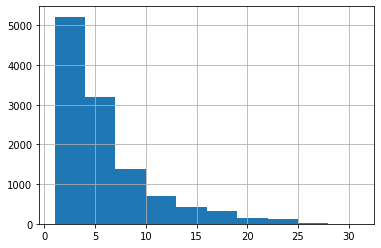

In [44]:
data[data['balcony'].isna()]['floor'].hist()

Количество квартир с не заполненным балконом экспоненциально убывает с ростом этажа, что полностью соответствует нашим ожиданиям для квартир без балконов 

In [45]:
data['balcony'].fillna(0, inplace=True)

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо.

</div>

#### Поле locality_name

In [46]:
present(data['locality_name'].isna().sum())

0.2067597788936242

In [47]:
data['locality_name'].isna().sum()

49

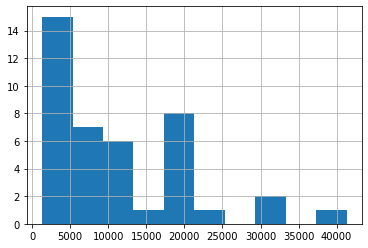

In [48]:
data[data['locality_name'].isna()]['cityCenters_nearest'].hist()

На гистограммами видно, что квартиры с незаполненным названием населенного пункта, в основном, находятся недалеко от центра. Заполним их основываясь на этом расстоянии.

In [49]:
tmp = data[data['cityCenters_nearest'].notna()].groupby('locality_name')['cityCenters_nearest'].median()
tmp = tmp.reset_index().sort_values('cityCenters_nearest').query('cityCenters_nearest < 50000')
tmp

,locality_name,cityCenters_nearest
8,Санкт-Петербург,12244.5
18,посёлок Парголово,19311.0
11,поселок Мурино,21888.0
24,посёлок Стрельна,23506.0
26,посёлок Шушары,24212.0
14,посёлок Левашово,25727.0
19,посёлок Песочный,26099.5
20,посёлок Петро-Славянка,27165.0
15,посёлок Лисий Нос,27297.0
12,посёлок Александровская,27468.0


In [50]:
data[data['cityCenters_nearest'].isna() & data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,3.00,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,3.00,4.0,25.8,3,True,...,27.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,2.55,9.0,45.6,2,True,...,34.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,2.55,5.0,47.3,2,False,...,8.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.0,3,False,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,2.55,9.0,30.5,2,True,...,29.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,2.55,9.0,36.6,2,True,...,29.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.60,16.0,16.0,7,True,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


Квартиры, имеющие пустое поле cityCenters_nearest и locality_name, оставим без изменений.

In [51]:
def fill_locality_name(row):
    if pd.notna(row['locality_name']):
        return row.at['locality_name']
    
    if pd.isna(row['cityCenters_nearest']):
        return row.at['locality_name']
    
    row = tmp[tmp['cityCenters_nearest'] > row['cityCenters_nearest']].iloc[0]
    return row.at['locality_name']

In [52]:
data['locality_name'] = data.apply(fill_locality_name, axis = 1)

In [53]:
data['locality_name'].isna().sum()

8

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично, хороший ход.

</div>

#### Поле airports_nearest

In [54]:
present(data['airports_nearest'].isna().sum())

23.38495295160133

In [55]:
data['airports_nearest'].isna().sum()

5542

In [56]:
data[data['airports_nearest'].isna() & data['locality_name'].isna()]['total_images'].count()

8

Те же самые 8 наблюдений

In [57]:
tmp = data[data['airports_nearest'].notna() & data['locality_name'].notna()].groupby('locality_name')['airports_nearest'].median()
tmp = tmp.reset_index().sort_values('airports_nearest')
tmp['locality_name'].unique()

array(['посёлок Александровская', 'Пушкин', 'посёлок Шушары', 'Павловск',
       'посёлок Петро-Славянка', 'Красное Село', 'посёлок Металлострой',
       'Колпино', 'посёлок Усть-Ижора', 'Санкт-Петербург',
       'посёлок Стрельна', 'посёлок Понтонный', 'посёлок Сапёрный',
       'Петергоф', 'Ломоносов', 'поселок Мурино', 'посёлок Левашово',
       'посёлок Парголово', 'посёлок Песочный', 'посёлок Лисий Нос',
       'поселок Лисий Нос', 'Сестрорецк', 'посёлок Белоостров',
       'посёлок Репино', 'посёлок Щеглово', 'Кронштадт', 'Зеленогорск',
       'посёлок Молодёжное'], dtype=object)

In [58]:
data[data['airports_nearest'].isna() & data['locality_name'].notna()]['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Видно, что названия населенных пунктов совпадают лишь частично. Судя по информации из <a href='https://www.google.com/search?newwindow=1&ei=sItUX7viGsqGwPAP-6uYgAU&q=%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%BE%D0%BA+%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%BE%D0%B3%D0%BE+%D1%82%D0%B8%D0%BF%D0%B0+%D0%B4%D1%80%D1%83%D0%B6%D0%BD%D0%B0%D1%8F+%D0%B3%D0%BE%D1%80%D0%BA%D0%B0+%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5+%D0%B4%D0%BE+%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82%D0%B0&oq=%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%BE%D0%BA+%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%BE%D0%B3%D0%BE+%D1%82%D0%B8%D0%BF%D0%B0+%D0%B4%D1%80%D1%83%D0%B6%D0%BD%D0%B0%D1%8F+%D0%B3%D0%BE%D1%80%D0%BA%D0%B0+%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5+%D0%B4%D0%BE+%D0%B0&gs_lcp=CgZwc3ktYWIQAxgAMgUIIRCgATIFCCEQoAEyBQghEKABOgQIABBHSgUICRIBMUoFCAoSATZQ3KQEWPXaBGDB6ARoAHACeACAAYEBiAG0BZIBAzAuNpgBAKABAaoBB2d3cy13aXrAAQE&sclient=psy-ab'> интернета</a>, расстояние до аэропорта в стальных населенных пунктах огромно и не имеет значение, заполним их -1

In [59]:
def fill_airports_nearest(row):
    if pd.notna(row['airports_nearest']):
        return row.at['airports_nearest']
    
    if pd.isna(row['locality_name']):
        return row.at['airports_nearest']
    
    df_frame = tmp[tmp['locality_name'] == row['locality_name']]
    if len(df_frame) == 0:
        return -1
    return df_frame.iloc[0].at['airports_nearest']

In [60]:
data['airports_nearest'] = data.apply(fill_airports_nearest, axis = 1)

In [61]:
data['airports_nearest'].isna().sum()

8

#### Поле cityCenters_nearest

In [62]:
present(data['cityCenters_nearest'].isna().sum())

23.287902443141057

In [63]:
data['cityCenters_nearest'].isna().sum()

5519

In [64]:
data[data['cityCenters_nearest'].isna() & data['locality_name'].isna()]['total_images'].count()

8

Те же самые 8 наблюдений

In [65]:
tmp = data[data['cityCenters_nearest'].notna() & data['locality_name'].notna()].groupby('locality_name')['cityCenters_nearest'].median()
tmp = tmp.reset_index().sort_values('cityCenters_nearest')
tmp['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Парголово', 'поселок Мурино',
       'посёлок Стрельна', 'посёлок Шушары', 'посёлок Левашово',
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Лисий Нос',
       'посёлок Александровская', 'посёлок Металлострой', 'Пушкин',
       'посёлок Усть-Ижора', 'поселок Лисий Нос', 'Красное Село',
       'Колпино', 'посёлок Понтонный', 'Павловск', 'Петергоф',
       'посёлок Щеглово', 'Сестрорецк', 'посёлок Сапёрный',
       'посёлок Белоостров', 'посёлок Репино', 'Кронштадт', 'Ломоносов',
       'Зеленогорск', 'посёлок Молодёжное'], dtype=object)

In [66]:
data[data['cityCenters_nearest'].isna() & data['locality_name'].notna()]['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Поступим анологично airports_nearest

In [67]:
def fill_cityCenters_nearest(row):
    if pd.notna(row['cityCenters_nearest']):
        return row.at['cityCenters_nearest']
    
    if pd.isna(row['locality_name']):
        return row.at['cityCenters_nearest']
    
    df_frame = tmp[tmp['locality_name'] == row['locality_name']]
    if len(df_frame) == 0:
        return -1
    return df_frame.iloc[0].at['cityCenters_nearest']

In [68]:
data['cityCenters_nearest'] = data.apply(fill_cityCenters_nearest, axis = 1)

In [69]:
data['cityCenters_nearest'].isna().sum()

8

#### Поле parks_around3000

In [70]:
data['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [71]:
data[data['parks_around3000'].isna()]['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Видно, что это поселки, в поселках нет парков. Заполним 0.

In [72]:
data['parks_around3000'].fillna(0, inplace=True)

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Не стоит спешить с выводами, что в поселках нет парков. Возможно просто поблизости квартиры парков нет.

</div>

#### Поле parks_nearest

In [73]:
data.loc[(data['parks_around3000'] == 0) & data['parks_nearest'].isna(),'parks_nearest'] = -1

In [74]:
present(data['parks_nearest'].isna().sum())

0.0

Будем считать, что парки не достижимы, если их нет в этом населенном пункте 

#### Поле ponds_around3000

In [75]:
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [76]:
data[data['ponds_around3000'].isna()]['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

По антологии с полем parks_around3000

In [77]:
data['ponds_around3000'].fillna(0, inplace=True)

#### Поле ponds_nearest

In [78]:
data.loc[(data['ponds_around3000'] == 0) & data['ponds_nearest'].isna(),'ponds_nearest'] = -1

In [79]:
present(data['ponds_nearest'].isna().sum())

0.0

#### Поле days_exposition

In [80]:
present(data['days_exposition'].isna().sum())

13.422507278788133

In [81]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Ни каких особенностей не выявлено, заполним медианой

In [82]:
data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)

In [83]:
present(data['days_exposition'].isna().sum())

0.0

#### Вывод

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23691 non-null  object 
 15  airports_nearest   

Все поля заполнены, кроме 8 наблюдений, в этих наблюдениях пропущено большое количество полей. Исключим их из расмотрения.

In [85]:
data.dropna(inplace=True)

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично.

</div>

### Замена типов данных

In [86]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [87]:
data['balcony'] = data['balcony'].astype('int')

In [88]:
data['days_exposition'] = data['days_exposition'].astype('int')

In [89]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [90]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [91]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [92]:
data['floors_total'] = data['floors_total'].astype('int')

In [93]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [94]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

### Вывод

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23691 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23691 non-null  int64         
 1   last_price            23691 non-null  float64       
 2   total_area            23691 non-null  float64       
 3   first_day_exposition  23691 non-null  datetime64[ns]
 4   rooms                 23691 non-null  int64         
 5   ceiling_height        23691 non-null  float64       
 6   floors_total          23691 non-null  int64         
 7   living_area           23691 non-null  float64       
 8   floor                 23691 non-null  int64         
 9   is_apartment          23691 non-null  bool          
 10  studio                23691 non-null  bool          
 11  open_plan             23691 non-null  bool          
 12  kitchen_area          23691 non-null  float64       
 13  balcony         

В ходе предобработки данные были очищены от пропусков и приведены к соответствующим типам

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Здорово, что ты постарался заполнить все пропуски. Так же хочу отметить, что иногда можно оставлять пропуски, когда их заполнение затруднено.

</div>

## Расчет дополнительных полей

### Цена квадратного метра

In [96]:
data['price_one_m_2'] = data['last_price'] / data['total_area']

### Даты

In [97]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [98]:
data['month'] = data['first_day_exposition'].dt.month

In [99]:
data['year'] = data['first_day_exposition'].dt.year

### Этаж

In [100]:
def floor_type(row):
    if row.at['floor'] == 1:
        return 'первый'
    if row.at['floor'] == row.at['floors_total']:
        return 'последний'
    return 'другой'

In [101]:
data['floor_type'] = data.apply(floor_type, axis = 1)

### Cоотношение площади

In [102]:
data['living_area_by_total_area'] = data['living_area'] / data['total_area']

In [103]:
data['kitchen_area_by_total_area'] = data['kitchen_area'] / data['total_area']

### Вывод

Для выполнения поставленного задания в таблицу были добавлены дополнительные поля

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично, необходимые значения добавлены, приступим к анализу!

</div>

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков

#### Площадь

In [104]:
import matplotlib.pyplot as plot

def show_graphs(name):
    data[name].hist()
    plot.show()
    data.boxplot(name, vert=False)

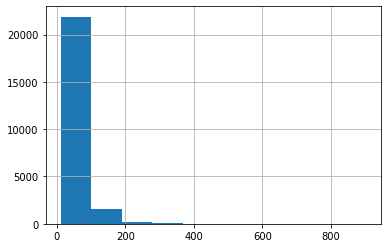

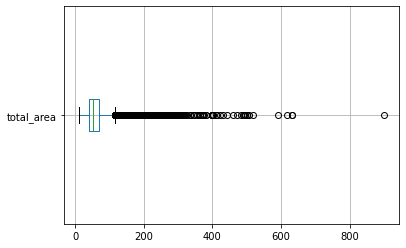

In [105]:
show_graphs('total_area')

Виден длинный хвост из «выбросов» после 160 кв. м. Посмотрим на стоимость этих квартир.

In [106]:
data[data['total_area'] > 700]['last_price']

19540    420000000.0
Name: last_price, dtype: float64

Действительно большая и дорогая квартира

In [107]:
data[data['total_area'] > 200]['last_price'].describe()

count    2.270000e+02
mean     5.981826e+07
std      7.422253e+07
min      7.900000e+06
25%      2.395000e+07
50%      3.500000e+07
75%      6.800000e+07
max      7.630000e+08
Name: last_price, dtype: float64

Видно, что больших квартир мало но цены на них адекватные

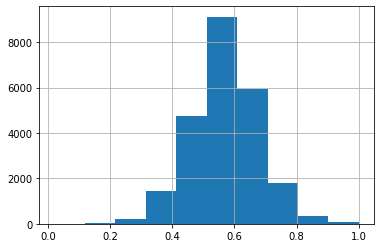

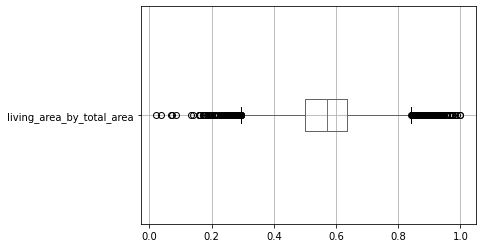

In [108]:
show_graphs('living_area_by_total_area')

Есть группа квартир, где жилая площадь больше общей (коэффициент больше 1) — это явно ошибка в данных.

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Как раз это может указывать на то, что заполнение пропусков в столбце `living_area` плохо отражало реальную картину значений.

</div>

In [109]:
data.drop(data.loc[data['living_area_by_total_area'] > 1].index, inplace=True)

Обратная сторона хвоста, вполне объяснима. ( большие кухни, ванны, гардеробные и т. п.)

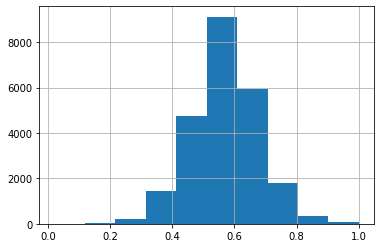

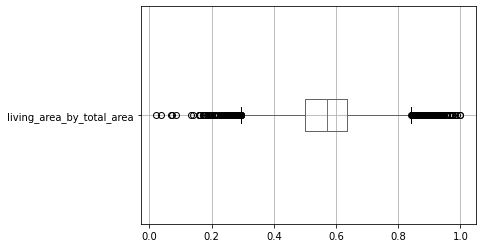

In [110]:
show_graphs('living_area_by_total_area')

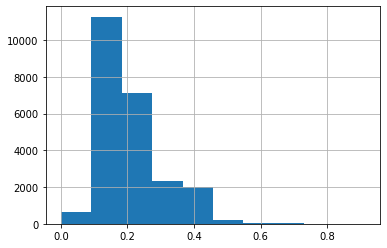

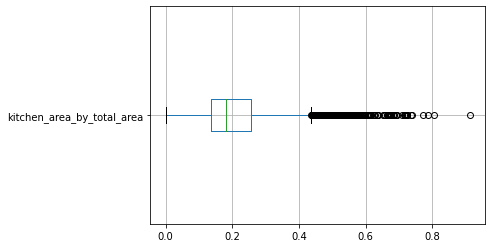

In [111]:
show_graphs('kitchen_area_by_total_area')

Есть квартиры, площадь кухни которых, сопоставима со всей площадью (коэффициент от 0.7). Посмотрим на общую площадь этих квартир.

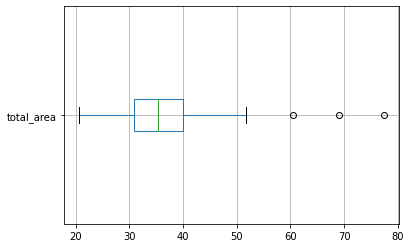

In [112]:
data.query('kitchen_area_by_total_area > 0.7').boxplot('total_area', vert=False)

In [113]:
data.query('kitchen_area_by_total_area > 0.7')['total_area'].count()

16

Маленькие квартиры  с 0.7 кухни, скорее всего ошибка данных

In [114]:
data.drop(data.loc[data['kitchen_area_by_total_area'] > 0.7].index, inplace=True)

#### Цена

In [115]:
raise SystemExit("Stop right there!")
show_graphs('last_price')

SystemExit: Stop right there!

Цены в основном в диапазоне до 10 миллионов рублей, что вполне ожидаемо, рассмотрим участок до 10  миллионов подробнее

In [ ]:
data[data['last_price'] < 100000000].boxplot('last_price', vert=False)

Большинство цен группируются до 2 миллионов так, как в данных много поселков

In [ ]:
data['last_price'].describe()

In [ ]:
data.sort_values('last_price')[['last_price','total_area','cityCenters_nearest']].head(10)

Есть одна квартира в центре Питера, которая выбивается из общей массы

In [ ]:
data.drop(data.loc[(data['last_price'] == 12190.0) & (data['cityCenters_nearest'] == 9176.0)].index, inplace=True)

In [ ]:
data.sort_values('last_price').head(2)[['last_price','total_area','cityCenters_nearest']]

In [ ]:
data[data['cityCenters_nearest'] > 0].sort_values('last_price').head(10)[['last_price','total_area','cityCenters_nearest']]

#### Число комнат

In [ ]:
show_graphs('rooms')

In [ ]:
data['rooms'].describe()

Рассмотрим отдельно квартиры с 0 комнат

In [ ]:
data.query('rooms == 0')['rooms'].count()

In [ ]:
data.query('rooms == 0 and studio == True')['rooms'].count()

In [ ]:
data.query('rooms != 0 and studio == True')['rooms'].head()

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Молодец, что определил основную причину нулевых комнат.

</div>

Заменим число комнат на единицу у студий 

In [ ]:
data.loc[data['studio'] == True,'rooms'] = 1

In [ ]:
data.query('rooms == 0')['rooms'].count()

In [ ]:
data.query('rooms == 0').boxplot('total_area', vert=False)

В основном, это маленькие квартиры, примерно до 30 кв. м. Таким квартирам можно выставить единицу, остальные исключить из расмотрения

In [ ]:
data.loc[data['total_area'] < 36,'rooms'] = 1

In [ ]:
data.query('rooms == 0')['rooms'].count()

In [ ]:
data.drop(data.loc[data['rooms']  == 0].index, inplace=True)

####  Высота потолков

In [ ]:
show_graphs('ceiling_height')

Основная масса квартир сплющена в маленькую полосочку. На гистограмме видно, что большинство потолков высотой до 10 метров. Оставим квартиры с высотой потолков от 2.5 до 10 метров

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Хочу обратить твое внимание на квартиры с высотой потолков выше 20 м, можно ли эти значения как-то скорректировать?

</div>

In [ ]:
data.drop(data.loc[(data['ceiling_height'] > 10) | (data['ceiling_height'] < 2.5)].index, inplace=True)

In [ ]:
show_graphs('ceiling_height')

Исключим еще до 4 метров

In [ ]:
data.drop(data.loc[data['ceiling_height'] > 4].index, inplace=True)

In [ ]:
show_graphs('ceiling_height')

#### Вывод

Входе исследовательского анализа были рассмотрены следующие поля: площадь, цена, число комнат, высота потолков. Редкие и выбивающиеся значения были удаленны из набора данных.

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Молодец, что ограничил данные от выбросов, но так же важно подсчитать, сколько значений удалено. Важно понимать, что мы не удалили много данных.

</div>

### Исследование количества времени для продажи квартиры

In [ ]:
show_graphs('days_exposition')

In [ ]:
data['days_exposition'].describe ()

In [ ]:
data[data['days_exposition'] < 200]['days_exposition'].hist(grid=True)

Квартиры в Питере продаются сравнительно быстро, не смотря на среднее значение в 95 дней, на гистограмме видно что плотность вероятности от 0 до 55 дней больше и как следствие вероятней, квартира будет продана в течении первых 2 месяцев

Продажи начиная от 410 дней считаются аномально долгими для Ленинградской области, что отчетливо видно на графике размаха.

In [ ]:
data[data['days_exposition'] < 25]['days_exposition'].hist(grid=True)

Быстрые продажи — вполне обычное дело, здесь аномалий не обнаружено.

#### Вывод

Для Ленинградской области быстрые продажи — обычное дело. Квартиры редко весят в объявление более 410 дней

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Хорошо. А какие продажи ты считаешь быстрыми?

</div>

### Анализ редких и выбивающихся значений

Редкие и выбивающиеся значения расположены выше

### Исследование факторов, влияющих на стоимость квартиры

In [ ]:
price_correlation = data[['last_price','price_one_m_2','total_area','rooms','cityCenters_nearest','floor_type','day_of_week','month','year']]

In [ ]:
price_correlation[price_correlation['cityCenters_nearest'] == -1]['cityCenters_nearest'].count()

In [ ]:
max_nearest = 2 * price_correlation['cityCenters_nearest'].max()
price_correlation['cityCenters_nearest'] = price_correlation['cityCenters_nearest'].replace(-1, max_nearest)

In [ ]:
price_correlation[price_correlation['cityCenters_nearest'] == -1]['cityCenters_nearest'].count()

In [ ]:
price_correlation.corr()

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Здорово, что ты построил матрицу корреляции. Ее можно также визуализировать с помощью библиотеки `seaborn`, применив метод `heatmap()`.

</div>

In [ ]:
pd.plotting.scatter_matrix(price_correlation, figsize=(10, 10))

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Думаю ты заметил большой список объектов перед графком. Чтобы это не выводилось, в конце кода графика нужно указать `plt.show()`.
    
Не забывай добавлять заголовки к графикам.

</div>

In [ ]:
price_correlation.groupby('floor_type')['last_price','price_one_m_2'].median().sort_values('price_one_m_2', ascending=False)

#### Вывод

Площадь квартиры сильно влияет на общую стоимость квартиры (коэффициент 0.646270), однако цена за квадратный метр от площади не зависит (0.299). Число комнат не влияет на стоимость квадратного метра (0.054), небольшое влияние на общую цену (0.361) обусловлено площадью (больше комнат, больше площадь (0.76) и, как следствие, больше цена). Удаленность от центра обратно коррелирует с ценой за квадратный метр (-0.45 — больше расстояние, дешевле квартиры). Первый этаж, в среднем, дешевле остальных. Последний этаж, в среднем, дороже первого, но не выдерживает конкуренции с квартирами в центре здания. Цена не зависит от даты размещения, коэффициенты очень малы.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отличный вывод. Здорово, что ты проанализировал и цену за кв.м. и полную цену квартиры.

</div>

### Анализ десяти населённых пунктов с наибольшим числом объявлений

In [ ]:
region_names = data.groupby('locality_name')['locality_name'].count()
region_names = region_names.reset_index(name='count').sort_values('count', ascending=False).head(10)
region_names

In [ ]:
region_names = region_names['locality_name'].values

In [ ]:
popular_regions = data.query('locality_name in @region_names')

In [ ]:
len(popular_regions)

In [ ]:
popular_regions.pivot_table(index='locality_name', values=['last_price','price_one_m_2']).sort_values('price_one_m_2', ascending=False)

#### Вывод

Цена за квадратный метр выше всего в Санкт-Петербурге, а ниже всего в Выборге 

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично.

</div>

### Анализ изменения цены по степени удалённости от центра

In [ ]:
petersburg = data.query('locality_name == "Санкт-Петербург"')

In [ ]:
len(petersburg)

In [ ]:
petersburg['cityCenters_nearest_int'] = petersburg['cityCenters_nearest'] / 1000

In [ ]:
petersburg['cityCenters_nearest_int'] = petersburg['cityCenters_nearest_int'].astype('int')

In [ ]:
petersburg['cityCenters_nearest_int'].unique()

In [ ]:
petersburg_price = petersburg.pivot_table(index='cityCenters_nearest_int', values='price_one_m_2').reset_index()

In [ ]:
petersburg_price.head(15)

In [ ]:
petersburg_price.plot(x='cityCenters_nearest_int', y='price_one_m_2', kind='line', grid=True)

#### Вывод

По графику видно, что после 9 километров цена начинает монотонно падать. Этот радиус и будем считать центом.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Ты корректно определил центр города, молодец.

</div>

### Сравнение квартир в центре с квартирами по всему городу

In [ ]:
petersburg_center = petersburg[petersburg['cityCenters_nearest_int'] <= 9]

#### Площадь

In [ ]:
petersburg_center.boxplot('total_area',vert=False)

In [ ]:
petersburg.boxplot('total_area',vert=False)

По графикам видно что квартиры в центре больше, так как медиана второго графика левее.

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Раз необходимо проверсти сравнение, то можно попробовать боксплоты отразить на одном графике. Так сравнивать будет намного удобнее.

</div>

#### Число комнат

In [ ]:
petersburg_center.boxplot('rooms', vert=False)

In [ ]:
petersburg.boxplot('rooms', vert=False)

В центре квартиры с бОльшим числом комнат, так как медиана второго графика левее.

#### Высота потолков

In [ ]:
petersburg_center['ceiling_height'].hist()

In [ ]:
petersburg['ceiling_height'].hist()

Распределение по высоте потолков примерно одинаковое и не зависит от удаленности от центра 

####  Факторы влияющие на стоимость квартиры

In [ ]:
petersburg['cityCenters_nearest'] = petersburg['cityCenters_nearest'].replace(-1,petersburg['cityCenters_nearest'].max() * 2)

In [ ]:
petersburg[['price_one_m_2','total_area','rooms','cityCenters_nearest','floor','day_of_week','month','year']].corr()

In [ ]:
petersburg_center['cityCenters_nearest'] = petersburg_center['cityCenters_nearest'].replace(-1,petersburg_center['cityCenters_nearest'].max() * 2)

In [ ]:
petersburg_center[['price_one_m_2','total_area','rooms','cityCenters_nearest','floor','day_of_week','month','year']].corr()

Из матриц корреляции видно, что число комнат в центре существенней влияет на стоимость квартир, тогда как роль удаленности от центра падает с расстоянием. Как в первом, так и во втором случаи  дата размещения не имеет ни какого значения.

In [ ]:
petersburg_center.groupby('floor_type')['last_price','price_one_m_2'].median().sort_values('price_one_m_2', ascending=False)

In [ ]:
petersburg.groupby('floor_type')['last_price','price_one_m_2'].median().sort_values('price_one_m_2', ascending=False)

Похоже, что влияние этажа  на цену в обоих случаях одинаково 

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
    
Не подскажешь хороший  способ сравнить ? :-)
</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Для сравнения конечно всегда лучше подходит визуализация. Выше я постаралсь оставить рекомендации, где и как удобнее сравнить. Если ты про матрицу корреляции, то здесь только можно постараться либо визуализировать саму матрицу, с помощью `heatmap()`, либо попробовать отразить на одном графике коэффиценты корреляции для всех параметров. И сделать две легенды для центра и всего города. Так же и для этажей. Какие типы графиков выбрать: хорошо подойдут столбчатые диаграммы или линейные графики.

</div>

### Вывод

В центре Питера находится более элитное жилье, квартиры здесь больше и, как следствие, с большим число комнат.

## Общий вывод

В ходе работы выяснено, что квартиры в Питере востребованы, так как объявление «висят» в среднем не более 410 дней.  На цену за квадратный метры существенное влияние оказывает удаленность квартиры от центра, однако с расстоянием, влияние ослабевает. В центральной части находятся преимущественно квартиры с большей площадью, но высота потолков у элитного жилья такая же 

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Молодец, что ты в выводе обозначил основные параметры, от которых зависит цена квартиры. Так же еще вывод можно дополнить портретами типичных квартир.

</div>

<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

Спасибо за твой интересный проект!
    
Ты отлично поработал с данными, постарася их изучить при заполнении пропусков.
    
Ты верно рассчитываешь коэффициенты корреляции и с легкостью поясняешь полученные значения. С визуализацией распределений ты тоже хорошо справился. Здорово, что применяешь функции для автоматизации вывода графиков.
    
Осталось немного доработать проект:
1. Скорректируй заполнение пропусков в столбцах `living_area` и `kitchen_area`.


Я уверенна, ты легко справишься с доработками, жду твоих исправлений:)     

</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод